<a href="https://colab.research.google.com/github/AchyDaMan/FinalProject_TelcoChurn/blob/main/FinalProject_TelcoChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Project - Telco churn sample data

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt

In [ ]:
#Load everything into a df

df = pd.read_csv('Telco-Customer-Churn.csv')

The first step that our group took towards processing this data was to calculate the percent of turnover for all clients in the data set. In order to calculate this, the number of clients who left and the number of clients who stayed were added up and the percentage of the number who left was calculated.

In [ ]:
#Calculating Percent Turnover
#These were first cracks at working with the data. Not relevant for our work but give some interesting numbers
yes = 0
no = 0

for i in df['Churn'].iteritems():
  #print(i[1])
  if 'Yes' in i[1]:
    yes += 1
  elif 'No' in i[1]:
    no += 1

print('They stayed:', no)
print('They left:', yes)
print('Percent turnover:', yes/(no+yes))

They stayed: 5174
They left: 1869
Percent turnover: 0.2653698707936959


Afterwards, we decided to analyze the relationship between contract type, which could be either yearly or month to month, and the percentages of churn associated with these contract types.

In [ ]:
#We will calculate how churn relates to contract type (month --> month, yearly)

monthlyChurn = 0
yearlyChurn = 0
monthlyKeep = 0
yearlyKeep = 0
rows = []
for i in df['Contract'].iteritems():
  if 'Month' in i[1]:
    #print(0)
    rows.append(0)
  elif 'year' in i[1]:
    #print(1)
    rows.append(1)
iter = 0
for i in df['Churn'].iteritems():
  #print(i[1])
  if 'Yes' in i[1]:
    if rows[iter] == 0:
      monthlyChurn += 1
    elif rows[iter] == 1:
      yearlyChurn += 1
  elif 'No' in i[1]:
    if rows[iter] == 0:
      monthlyKeep += 1
    elif rows[iter] == 1:
      yearlyKeep += 1 
  iter += 1   

print(monthlyChurn, yearlyChurn, monthlyKeep, yearlyKeep)

1655 214 2220 2954


The visualization of the relationship between contract type and churn includes plotting the relationship between the two variables in a bar chart that is readable.

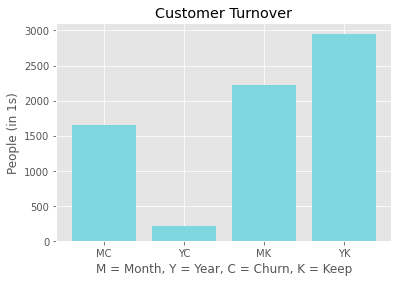

In [ ]:
#Plot the relationship between Monthly/Yearly contracts and churn rate

plt.style.use('ggplot')
x = ['MC', 'YC', 'MK', 'YK']
y = [monthlyChurn, yearlyChurn, monthlyKeep, yearlyKeep]
x_pos = np.arange(len(x))
plt.bar(x_pos, y, color='#7ed6df')
plt.xlabel("M = Month, Y = Year, C = Churn, K = Keep")
plt.ylabel("People (in 1s)")
plt.title("Customer Turnover")
plt.xticks(x_pos, x)
plt.show()



The next relationship analyzed was that between seniority (whether the client is a senior citizen) and tenure, which is the time in months that the client has remained using the company's services.

In [ ]:
#We will calculate the relation between seniority and tenure (in months)

#print(df['SeniorCitizen'])
seniorList = list(df['SeniorCitizen'])
iter = 0
tenureList = list(df['tenure'])
avgTenure = mean(tenureList)
print(round(avgTenure,2))

seniorTenure = []
notThat = []
iter = 0
for i in seniorList:
  if(i == 0):
    notThat.append(tenureList[iter])
  elif(i == 1):
    seniorTenure.append(tenureList[iter])
  iter += 1

notMean = mean(notThat)
seniorMean = mean(seniorTenure)

32.37


After calculating, this age and tenure relationship was plotted in a visual bar chart.

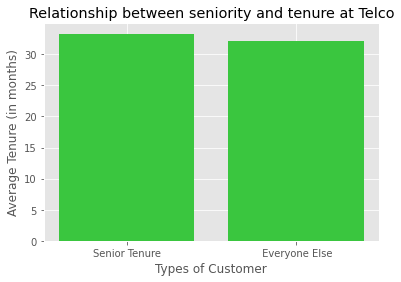

In [ ]:
#Plot the senior/tenure relationship
plt.style.use('ggplot')
x = ['Senior Tenure' ,' Everyone Else']
y = [seniorMean, notMean]
x_pos = np.arange(len(x))
plt.bar(x_pos, y, color='#3ac63f')
plt.xlabel("Types of Customer")
plt.ylabel("Average Tenure (in months)")
plt.title("Relationship between seniority and tenure at Telco")
plt.xticks(x_pos, x)
plt.show()

In order to tackle the last research question on the relationship between payment method and churn, the data was similarly analyzed and visualized.

In [ ]:
#We will calculate how churn relates to type of payment method 
#These include e-check, credit card, bank transfer, and mailed check

EcheckChurn = 0
McheckChurn = 0
EcheckKeep = 0
McheckKeep = 0
rows = []
for i in df['PaymentMethod'].iteritems():
  if 'Electronic check' in i[1]:
    rows.append(0) 
  elif 'Credit card (automatic)' in i[1]:
    rows.append(1)
  elif 'Bank transfer (automatic)' in i[1]:
    rows.append(2)
  elif 'Mailed check' in i[1]:
    rows.append(3)
#print(rows) 

iter = 0
for i in df['Churn'].iteritems():
  if 'Yes' in i[1]:
    if rows[iter] < 3:
      EcheckChurn += 1
    else:
      McheckChurn += 1
  elif 'No' in i[1]:
    if rows[iter] < 3:
      EcheckKeep += 1
    else:
      McheckKeep += 1 
  iter += 1   

print(EcheckChurn, McheckChurn, EcheckKeep, McheckKeep)

1561 308 3870 1304


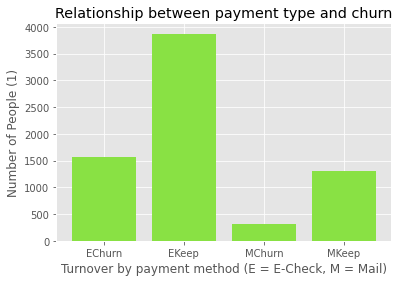

In [ ]:
#Plot the relation between payment type (electronic vs mailed) and churn/turnover
plt.style.use('ggplot')
x = ['EChurn' ,'EKeep', 'MChurn', 'MKeep']
y = [EcheckChurn, EcheckKeep, McheckChurn, McheckKeep]
x_pos = np.arange(len(x))
plt.bar(x_pos, y, color='#89e144')
plt.xlabel("Turnover by payment method (E = E-Check, M = Mail)")
plt.ylabel("Number of People (1)")
plt.title("Relationship between payment type and churn")
plt.xticks(x_pos, x)
plt.show()